**TASK 5: Quality Assurance**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sales_df = pd.read_csv('sales.csv', index_col=0)
stock_df = pd.read_csv('sensor_stock_levels.csv', index_col=0)
temp_df = pd.read_csv('sensor_storage_temperature.csv', index_col=0)

In [3]:
print(f'sales dataset consist of {sales_df.shape[0]} rows and {sales_df.shape[1]} columns')
print(f'stock dataset consist of {stock_df.shape[0]} rows and {stock_df.shape[1]} columns')
print(f'temp dataset consist of {temp_df.shape[0]} rows and {temp_df.shape[1]} columns')

sales dataset consist of 7829 rows and 9 columns
stock dataset consist of 15000 rows and 4 columns
temp dataset consist of 23890 rows and 3 columns


In [4]:
sales_agg = sales_df.groupby(['timestamp', 'product_id']).agg({'quantity': 'sum'}).reset_index()
stock_agg = stock_df.groupby(['timestamp', 'product_id']).agg({'estimated_stock_pct': 'mean'}).reset_index()
temp_agg = temp_df.groupby(['timestamp']).agg({'temperature': 'mean'}).reset_index()

In [5]:
merged_df = stock_agg.merge(sales_agg, on=['timestamp', 'product_id'], how='left')
merged_df = merged_df.merge(temp_agg, on='timestamp', how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:03,891e242e-4e58-469f-8de1-a60ffa8eb286,0.80,NaN,NaN
1,2022-03-01 09:00:12,440eb479-cf6a-4c55-ba8b-4475bc66dd06,0.33,NaN,NaN
2,2022-03-01 09:00:23,ae7c026a-2854-4342-8e0b-b1186cedbbe3,0.20,NaN,1.85
3,2022-03-01 09:00:48,adfbf330-cb1a-4c42-933d-f8fbee4696ad,0.11,NaN,NaN
4,2022-03-01 09:00:53,9708cf5b-aa69-4320-a013-9d234c40e63f,0.57,NaN,NaN


In [6]:
merged_df['quantity'] = merged_df['quantity'].fillna(0)

In [7]:
product_categories = sales_df[['product_id', 'category']]
product_categories = product_categories.drop_duplicates()

product_price = sales_df[['product_id', 'unit_price']]
product_price = product_price.drop_duplicates()

In [8]:
merged_df = merged_df.merge(product_categories, on="product_id", how="left")
merged_df = merged_df.merge(product_price, on="product_id", how="left")

In [9]:
merged_df = pd.get_dummies(merged_df, columns=['category'])
merged_df.drop(columns=['product_id'], inplace=True)

In [10]:
eda = merged_df.copy()
num = merged_df.columns

In [11]:
eda.describe().T

,count,mean,std,min,25%,50%,75%,max
estimated_stock_pct,14998.0,0.502700,0.286840,0.01,0.2600,0.500,0.750,1.00
quantity,14998.0,0.000000,0.000000,0.00,0.0000,0.000,0.000,0.00
temperature,1300.0,-0.590900,11.243550,-30.93,-3.0325,-1.135,1.705,34.72
unit_price,14998.0,8.959349,5.424809,0.19,4.9900,8.190,12.490,23.99
category_baby products,14998.0,0.047673,0.213081,0.00,0.0000,0.000,0.000,1.00
category_baked goods,14998.0,0.044406,0.206002,0.00,0.0000,0.000,0.000,1.00
category_baking,14998.0,0.043873,0.204818,0.00,0.0000,0.000,0.000,1.00
category_beverages,14998.0,0.046139,0.209794,0.00,0.0000,0.000,0.000,1.00
category_canned foods,14998.0,0.045073,0.207470,0.00,0.0000,0.000,0.000,1.00
category_cheese,14998.0,0.047006,0.211659,0.00,0.0000,0.000,0.000,1.00


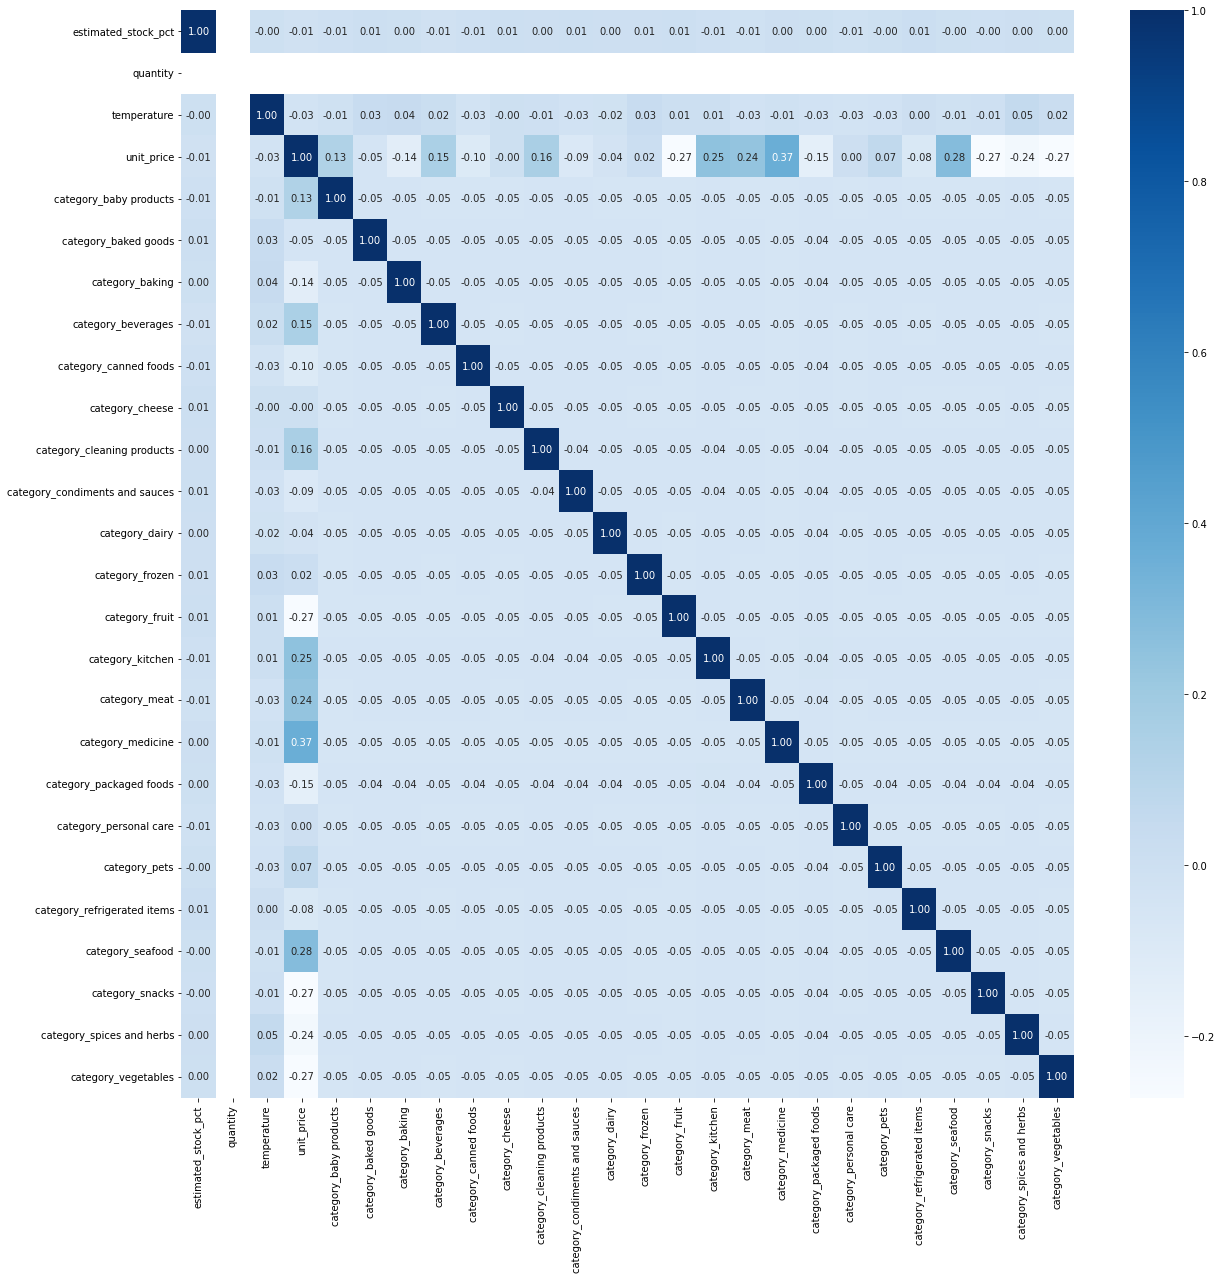

In [13]:
plt.figure(figsize=(20, 20))
sns.heatmap(eda[num].corr(), cmap='Blues', annot=True, fmt='.2f')